In [2]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
%matplotlib inline

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [23]:
df = pd.read_csv('Employee_Compensation.csv')
df

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.00,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.00,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.00,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.00,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.00,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799550,6,4300,4334,Fiscal,2022,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,49296190,112266.98,323.70,0.00,112590.68,22785.57,0.00,8941.25,31726.82,144317.50
799551,6,4300,4334,Fiscal,2022,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,49312539,112255.91,0.00,0.00,112255.91,22790.85,0.00,9549.86,32340.71,144596.62
799552,6,4300,4337,Fiscal,2022,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,49277494,124463.41,693.45,0.00,125156.86,25260.96,0.00,9507.67,34768.63,159925.49
799553,6,4300,4337,Fiscal,2022,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,49284255,124457.35,0.00,624.00,125081.35,25390.64,0.00,9981.40,35372.04,160453.39


In [13]:
df['Total Salary'].value_counts()

250.00      708
0.00        644
1196.00     293
150.00      147
200.00      124
           ... 
41665.08      1
39652.81      1
46881.47      1
39951.24      1
9636.30       1
Name: Total Salary, Length: 720338, dtype: int64

In [28]:
df.drop(df[df['Total Salary'] < 1].index, inplace = True)

In [29]:
df.shape

(798507, 22)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798507 entries, 0 to 799554
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  798507 non-null  int64  
 1   Job Family Code          798507 non-null  object 
 2   Job Code                 798507 non-null  object 
 3   Year Type                798507 non-null  object 
 4   Year                     798507 non-null  int64  
 5   Organization Group       798507 non-null  object 
 6   Department Code          798505 non-null  object 
 7   Department               798505 non-null  object 
 8   Union Code               798328 non-null  float64
 9   Union                    798328 non-null  object 
 10  Job Family               798507 non-null  object 
 11  Job                      798502 non-null  object 
 12  Employee Identifier      798507 non-null  int64  
 13  Salaries                 798507 non-null  float64
 14  Over

In [31]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,798507.000000,798507.000000,798328.000000,7.985070e+05,7.985070e+05,798507.000000,798507.000000,7.985070e+05,798507.000000,798507.000000,798507.000000,798507.000000,7.985070e+05
mean,2.978669,2017.267479,491.951695,2.403245e+07,7.365210e+04,5934.086880,3795.102573,8.338129e+04,14955.921963,9943.659259,5286.197978,30185.779200,1.135671e+05
std,1.580983,2.712712,330.202620,2.071994e+07,4.971742e+04,14197.334345,7612.621606,5.814716e+04,11184.818039,6311.332626,3802.634235,18884.665104,7.538198e+04
min,1.000000,2013.000000,1.000000,0.000000e+00,-1.843773e+04,-22453.280000,-19131.100000,1.000000e+00,-30621.430000,-1288.180000,-10636.500000,-21295.150000,-8.965960e+03
25%,2.000000,2015.000000,250.000000,3.395600e+04,3.408126e+04,0.000000,0.000000,3.746939e+04,5851.955000,3369.030000,2079.160000,13778.290000,5.209271e+04
50%,2.000000,2017.000000,535.000000,3.698552e+07,7.189816e+04,0.000000,771.420000,7.929098e+04,14985.900000,12512.550000,5174.770000,33546.890000,1.131488e+05
75%,4.000000,2020.000000,790.000000,4.193636e+07,1.059372e+05,4796.690000,4500.810000,1.184270e+05,21552.060000,14707.705000,7881.115000,42513.550000,1.617196e+05
max,7.000000,2022.000000,990.000000,5.114662e+07,1.068128e+06,373229.680000,342802.630000,1.068128e+06,200081.200000,148765.680000,82494.960000,431341.840000,1.499470e+06


In [53]:
Sampledf = df.iloc[:,[4,16,20]].sample(frac=0.2)


In [54]:

Sampledf

,Year,Total Salary,Total Benefits
646015,2019,167.00,13.22
564169,2017,15791.14,8126.82
767027,2022,127362.62,35414.10
331443,2020,119704.48,49716.62
252422,2018,82977.62,37085.10
...,...,...,...
331616,2020,294990.84,91685.40
502593,2015,64005.46,31829.12
394547,2013,68894.01,35873.77
318720,2020,98610.10,44988.16


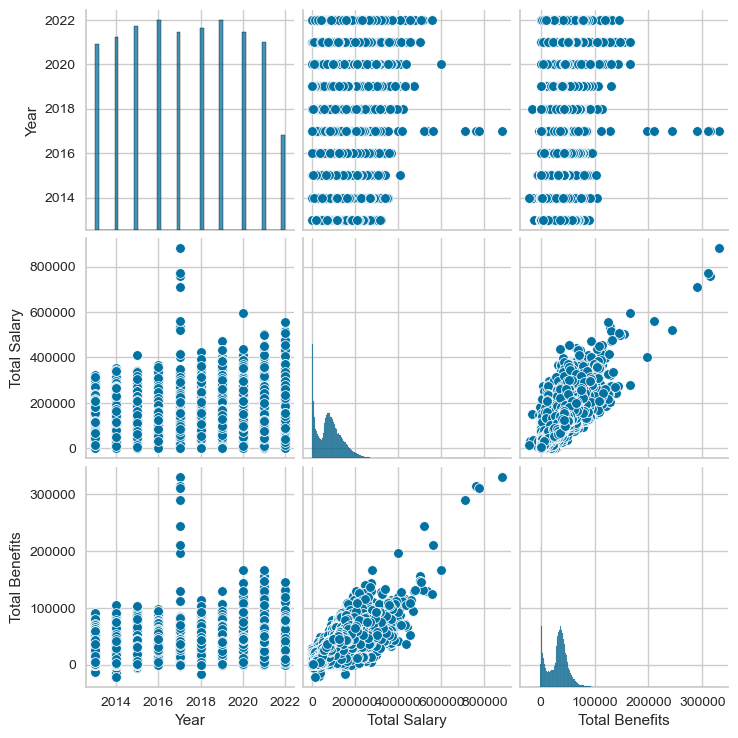

In [55]:
sns.pairplot(Sampledf)

In [64]:
from sklearn.preprocessing import MinMaxScaler
X = Sampledf.iloc[:,[1,2]].values
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

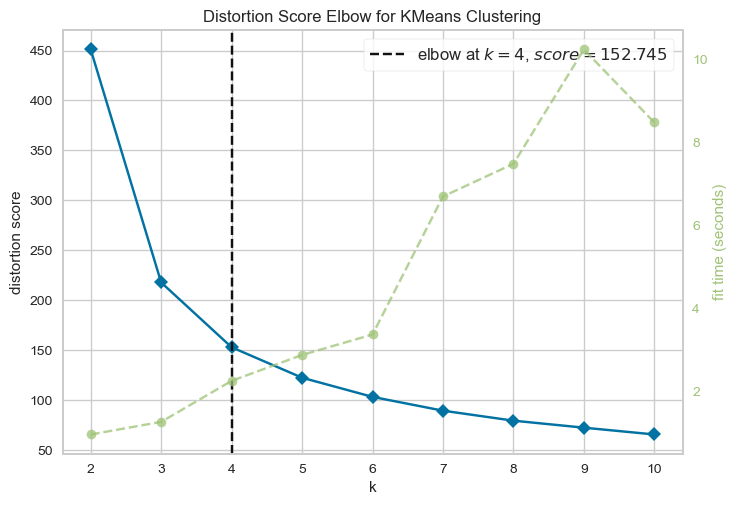

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:

model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()

In [66]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

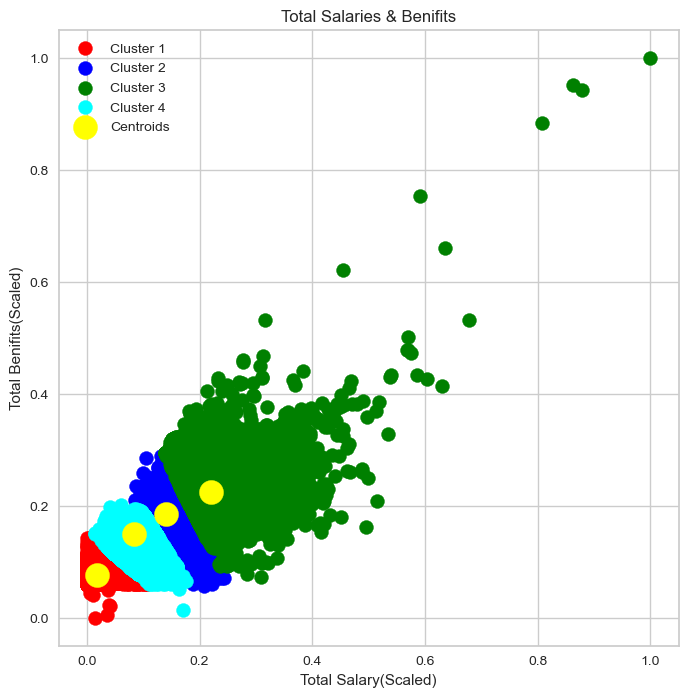

In [67]:
plt.figure(figsize = (8,8))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c= 'Yellow', label = 'Centroids')
plt.title('Total Salaries & Benifits')
plt.xlabel('Total Salary(Scaled)')
plt.ylabel('Total Benifits(Scaled)')
plt.legend()
plt.show()

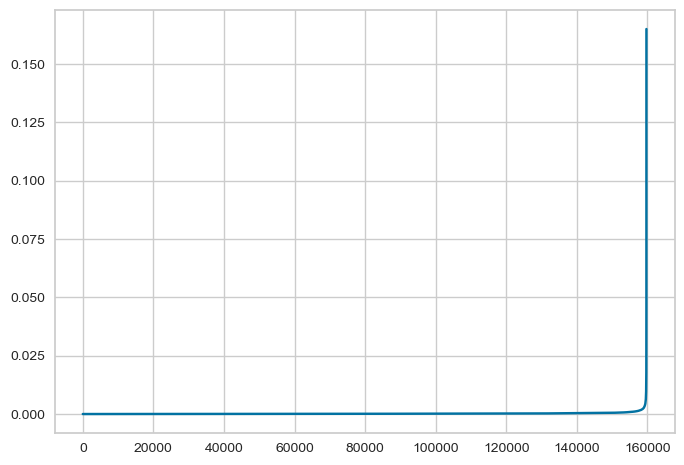

In [69]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

In [62]:
y_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

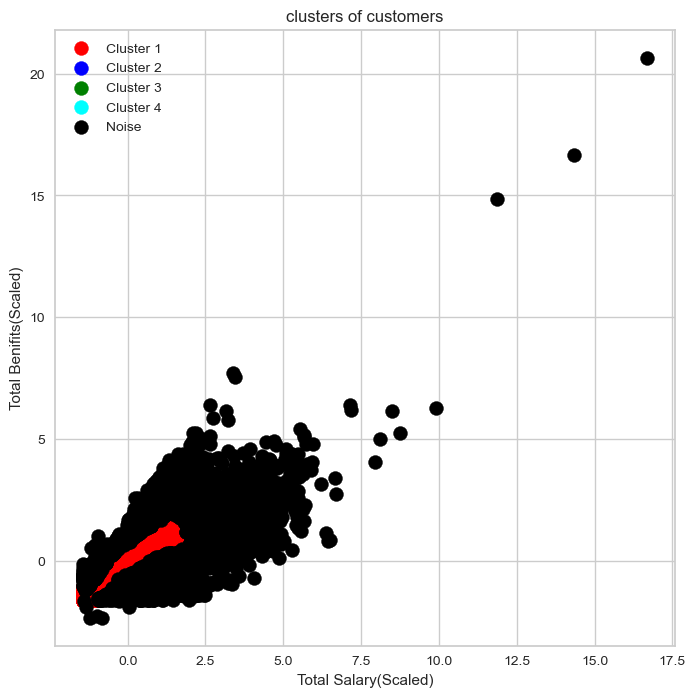

In [63]:
plt.figure(figsize = (8,8))
plt.scatter(X[y_dbscan == 0,0],X[y_dbscan == 0,1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1,0],X[y_dbscan == 1,1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2,0],X[y_dbscan == 2,1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3,0],X[y_dbscan == 3,1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == -1,0],X[y_dbscan == -1,1], s= 100, c = 'black', label = 'Noise')
plt.title('clusters of customers')
plt.xlabel('Total Salary(Scaled)')
plt.ylabel('Total Benifits(Scaled)')
plt.legend()
plt.show()